## the playground link
https://www.kaggle.com/competitions/playground-series-s5e5

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s5e5/sample_submission.csv
/kaggle/input/playground-series-s5e5/train.csv
/kaggle/input/playground-series-s5e5/test.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')

train = pd.read_csv("/kaggle/input/playground-series-s5e5/train.csv")
test = pd.read_csv("/kaggle/input/playground-series-s5e5/test.csv")
submission = pd.read_csv("/kaggle/input/playground-series-s5e5/sample_submission.csv")

In [3]:
print("Train Shape:", train.shape)
print("Test Shape:", test.shape)
print("\nTrain Info:")
train.info()
print("\nTest Info:")
test.info()
print("\nTrain Describe:")
train.describe()

Train Shape: (750000, 9)
Test Shape: (250000, 8)

Train Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id          750000 non-null  int64  
 1   Sex         750000 non-null  object 
 2   Age         750000 non-null  int64  
 3   Height      750000 non-null  float64
 4   Weight      750000 non-null  float64
 5   Duration    750000 non-null  float64
 6   Heart_Rate  750000 non-null  float64
 7   Body_Temp   750000 non-null  float64
 8   Calories    750000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 51.5+ MB

Test Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id          250000 non-null  int64  
 1   Sex         250000 non-null  object 
 2   Age     

,id,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000
mean,374999.500000,41.420404,174.697685,75.145668,15.421015,95.483995,40.036253,88.282781
std,216506.495284,15.175049,12.824496,13.982704,8.354095,9.449845,0.779875,62.395349
min,0.000000,20.000000,126.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,187499.750000,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,34.000000
50%,374999.500000,40.000000,174.000000,74.000000,15.000000,95.000000,40.300000,77.000000
75%,562499.250000,52.000000,185.000000,87.000000,23.000000,103.000000,40.700000,136.000000
max,749999.000000,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


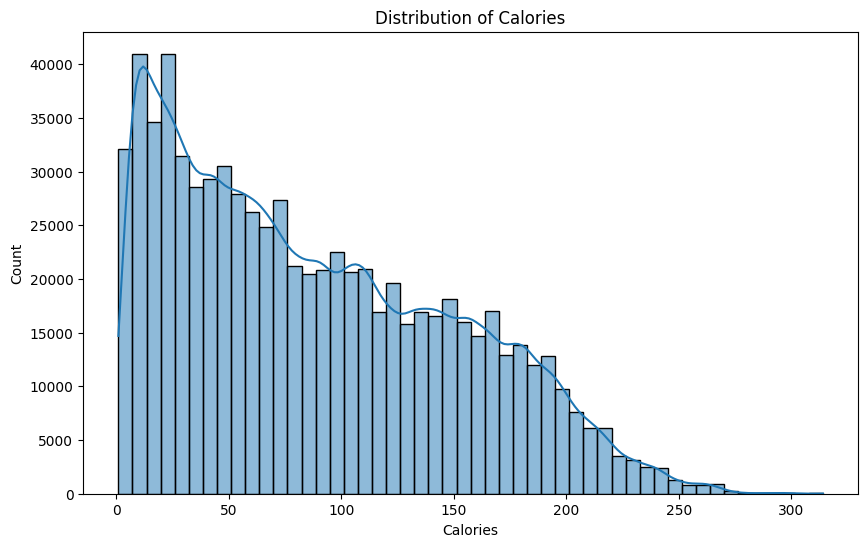

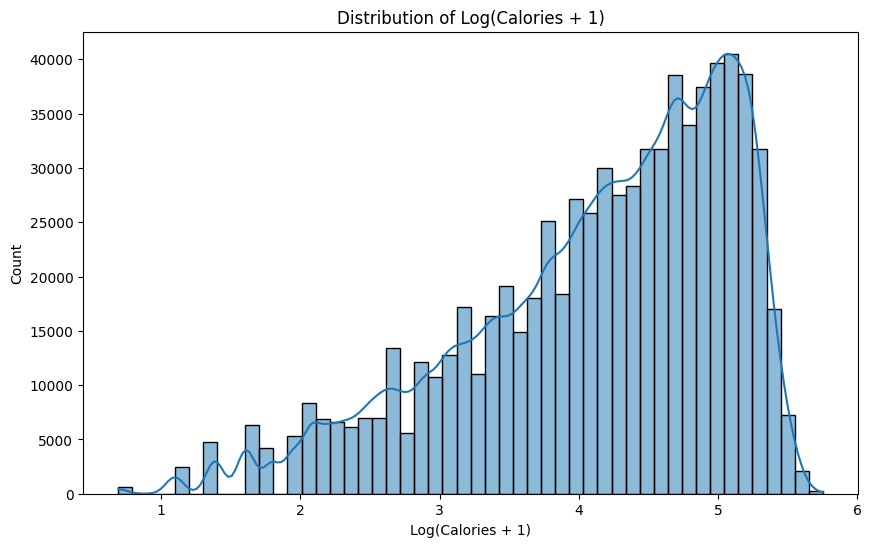

In [4]:
plt.figure(figsize=(10, 6))
sns.histplot(train['Calories'], bins=50, kde=True)
plt.title('Distribution of Calories')
plt.xlabel('Calories')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(np.log1p(train['Calories']), bins=50, kde=True)
plt.title('Distribution of Log(Calories + 1)')
plt.xlabel('Log(Calories + 1)')
plt.ylabel('Count')
plt.show()

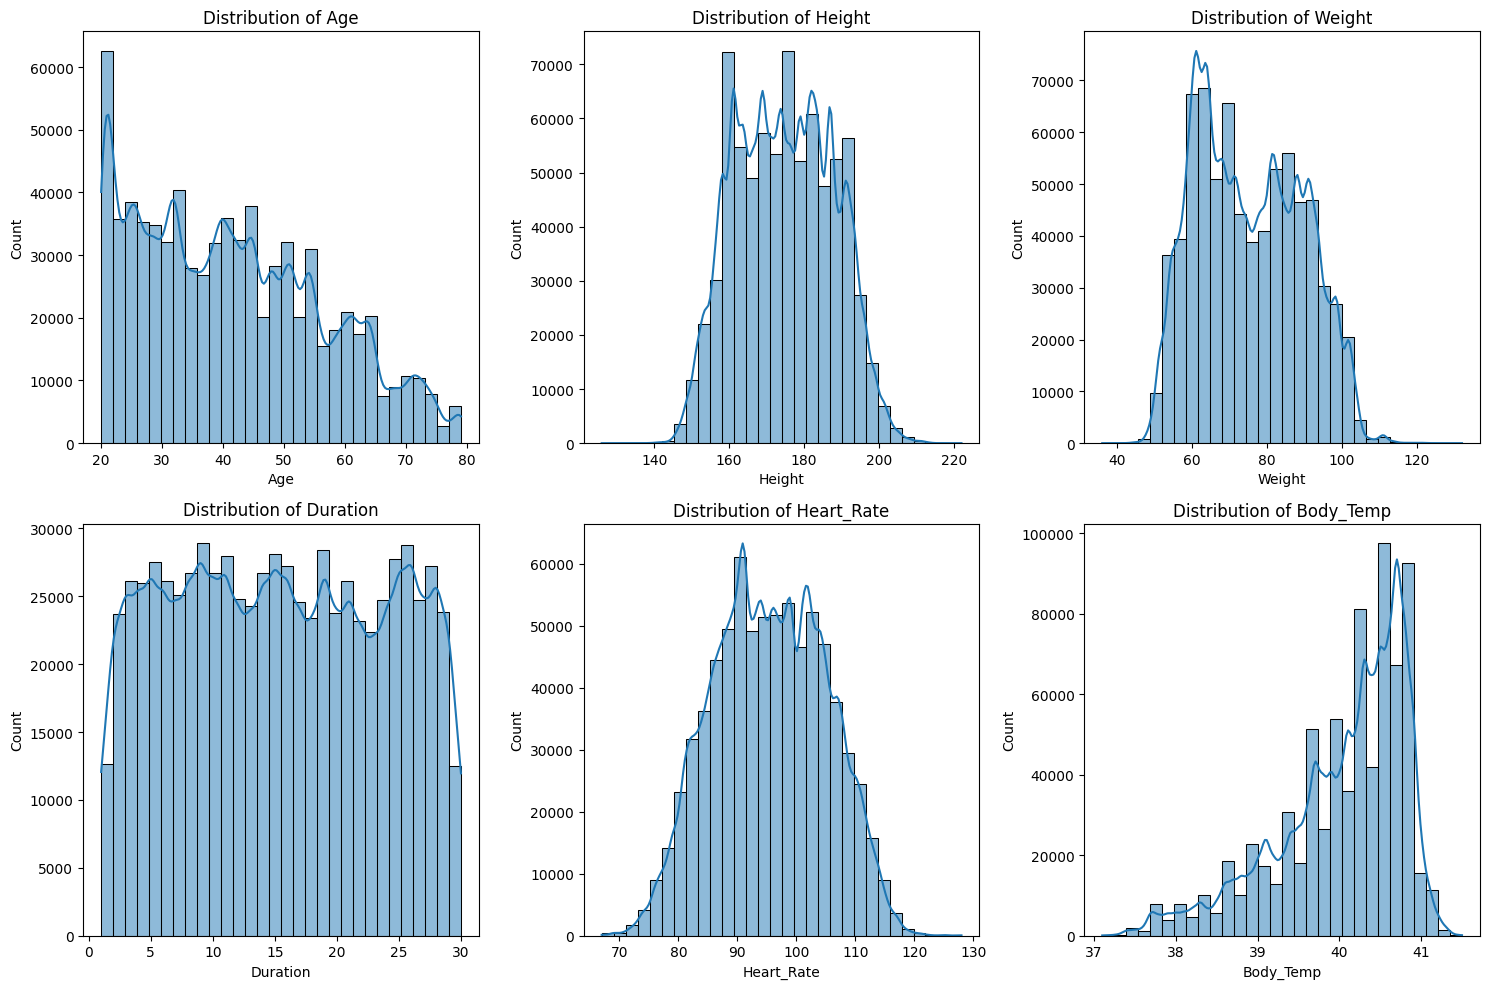


Sex Distribution:
Sex
female    375721
male      374279
Name: count, dtype: int64


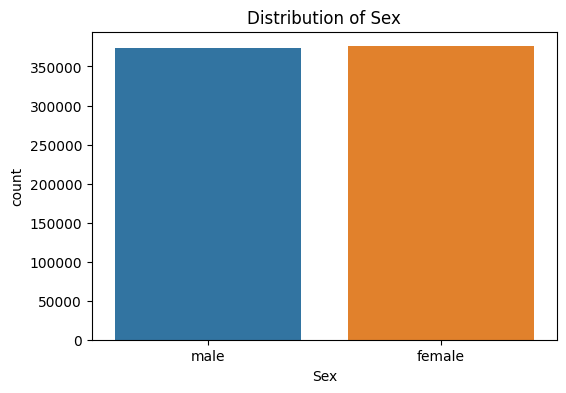

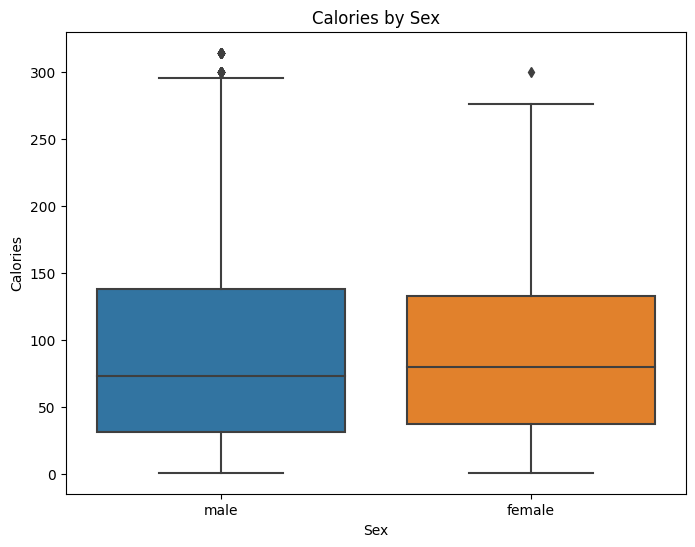

In [5]:
numerical_features = ['Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp']
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(train[feature], bins=30, kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

print("\nSex Distribution:")
print(train['Sex'].value_counts())

plt.figure(figsize=(6, 4))
sns.countplot(x='Sex', data=train)
plt.title('Distribution of Sex')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x='Sex', y='Calories', data=train)
plt.title('Calories by Sex')
plt.show()

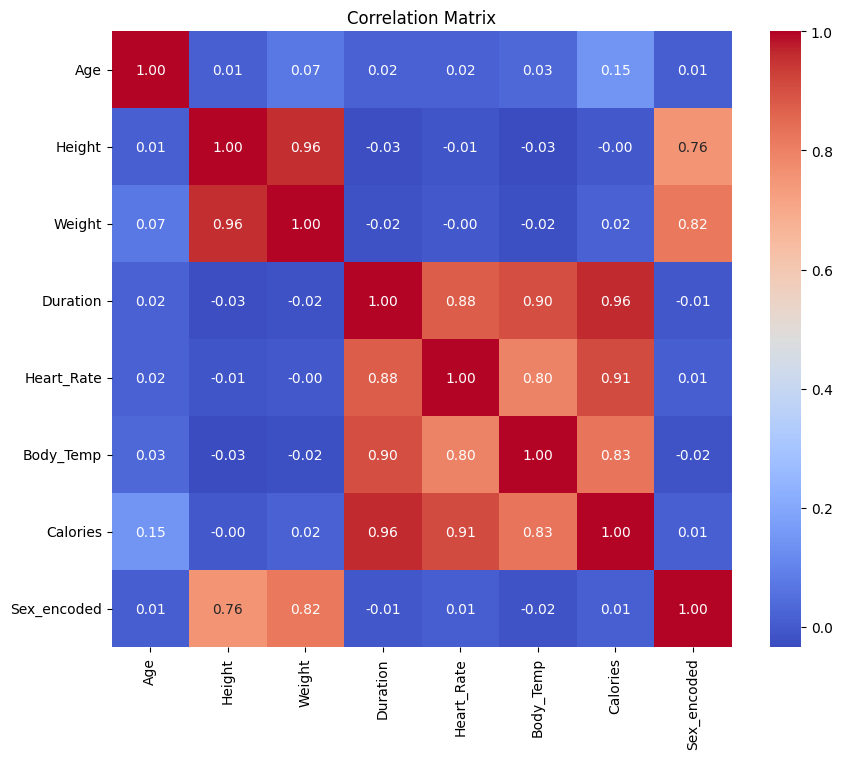

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train['Sex_encoded'] = le.fit_transform(train['Sex'])

corr = train[numerical_features + ['Calories', 'Sex_encoded']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [7]:
train = train.drop('Sex_encoded', axis=1)

def add_feature_cross_terms(df, numerical_features):
    df_new = df.copy()
    for i in range(len(numerical_features)):
        for j in range(i + 1, len(numerical_features)):
            feature1 = numerical_features[i]
            feature2 = numerical_features[j]
            cross_term_name = f"{feature1}_x_{feature2}"
            df_new[cross_term_name] = df_new[feature1] * df_new[feature2]
    return df_new

train = add_feature_cross_terms(train, numerical_features)
test = add_feature_cross_terms(test, numerical_features)

train['Sex'] = le.fit_transform(train['Sex'])
test['Sex'] = le.transform(test['Sex'])

train['Sex'] = train['Sex'].astype('category')
test['Sex'] = test['Sex'].astype('category')

X = train.drop(columns=['id', 'Calories'])
y = np.log1p(train['Calories'])
X_test = test.drop(columns=['id'])

FEATURES = X.columns.tolist()

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_log_error
from catboost import CatBoostRegressor
import time

FOLDS = 5
RANDOM_STATE = 42

kf = KFold(n_splits=FOLDS, shuffle=True, random_state=RANDOM_STATE)

cat_features = ['Sex']  
model_params = {
    'iterations': 2000,
    'learning_rate': 0.02,
    'depth': 10,
    'l2_leaf_reg': 3,
    'random_seed': RANDOM_STATE,
    'eval_metric': 'RMSE',
    'early_stopping_rounds': 100,
    'cat_features': cat_features,
    'verbose': 100
}

results = {
    'oof': np.zeros(len(train)),
    'pred': np.zeros(len(test)),
    'rmsle': [],
    'train_times': []
}

print("=== Training CatBoost ===")


for fold, (train_idx, valid_idx) in enumerate(kf.split(X, y)):
    print(f"\nFold {fold+1}")
    

    x_train, y_train = X.iloc[train_idx], y[train_idx]
    x_valid, y_valid = X.iloc[valid_idx], y[valid_idx]
    

    model = CatBoostRegressor(**model_params)
    

    start_time = time.time()
    

    model.fit(
        x_train, y_train,
        eval_set=(x_valid, y_valid),
        use_best_model=True
    )
    

    train_time = time.time() - start_time
    results['train_times'].append(train_time)
    

    oof_pred = model.predict(x_valid)
    test_pred = model.predict(X_test)
    

    results['oof'][valid_idx] = oof_pred
    results['pred'] += test_pred / FOLDS
    

    rmsle = np.sqrt(mean_squared_log_error(np.expm1(y_valid), np.expm1(oof_pred)))
    results['rmsle'].append(rmsle)
    
    print(f"Fold {fold+1} RMSLE: {rmsle:.4f}")
    print(f"Training time: {train_time:.1f} sec")


mean_rmsle = np.mean(results['rmsle'])
std_rmsle = np.std(results['rmsle'])
print(f"\nCatBoost Performance:")
print(f"Mean RMSLE: {mean_rmsle:.4f} ± {std_rmsle:.4f}")
print(f"Average training time: {np.mean(results['train_times']):.1f} sec")



=== Training CatBoost ===

Fold 1
0:	learn: 0.9447913	test: 0.9439450	best: 0.9439450 (0)	total: 197ms	remaining: 6m 33s
100:	learn: 0.1541423	test: 0.1539239	best: 0.1539239 (100)	total: 13.8s	remaining: 4m 19s
200:	learn: 0.0663868	test: 0.0664893	best: 0.0664893 (200)	total: 27s	remaining: 4m 1s
300:	learn: 0.0606794	test: 0.0612420	best: 0.0612420 (300)	total: 40.6s	remaining: 3m 49s
400:	learn: 0.0596592	test: 0.0605528	best: 0.0605528 (400)	total: 53.8s	remaining: 3m 34s
500:	learn: 0.0590760	test: 0.0602311	best: 0.0602311 (500)	total: 1m 6s	remaining: 3m 20s
600:	learn: 0.0586737	test: 0.0600694	best: 0.0600694 (600)	total: 1m 20s	remaining: 3m 7s
700:	learn: 0.0583352	test: 0.0599374	best: 0.0599374 (700)	total: 1m 33s	remaining: 2m 53s
800:	learn: 0.0580246	test: 0.0598479	best: 0.0598479 (800)	total: 1m 47s	remaining: 2m 40s
900:	learn: 0.0577621	test: 0.0597804	best: 0.0597804 (900)	total: 2m	remaining: 2m 26s
1000:	learn: 0.0574912	test: 0.0597180	best: 0.0597178 (996)	tot

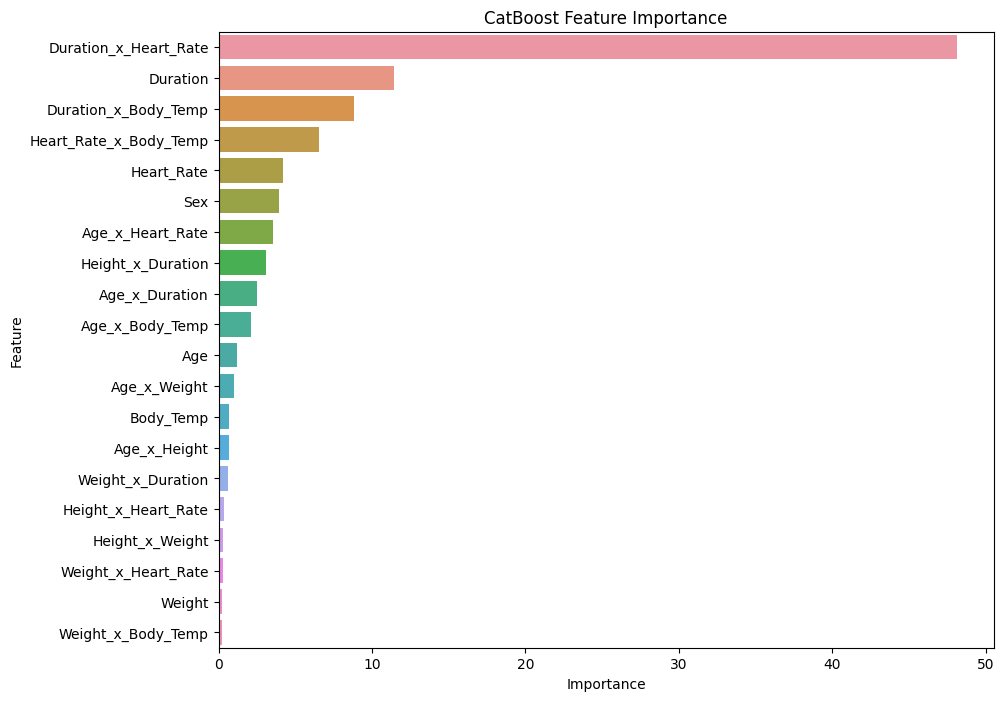


Submission Summary:
Predictions Mean: 88.18
Predictions Median: 76.46

Submission Head:
       id    Calories
0  750000   27.403336
1  750001  107.631067
2  750002   87.841410
3  750003  124.495845
4  750004   76.351078


In [9]:
feature_importance = model.get_feature_importance()
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
importance_df = importance_df.sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(20))
plt.title('CatBoost Feature Importance')
plt.show()

y_preds = np.expm1(results['pred'])
y_preds = np.clip(y_preds, 1, 314)  

submission['Calories'] = y_preds
submission.to_csv('catboost_submission.csv', index=False)

print("\nSubmission Summary:")
print(f"Predictions Mean: {y_preds.mean():.2f}")
print(f"Predictions Median: {np.median(y_preds):.2f}")
print("\nSubmission Head:")
print(submission.head())